In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import masked_array
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from tqdm.notebook import tqdm
from astropy.table import Table
plt.style.use('dark_background')

In [2]:
filepath = '/Users/gilliancartwright/Desktop/Research/Deep Learning and Image Segmentation/Image-Segmentation/'
filename = filepath + 'simulation_file.fits'

hdu_list = fits.open(filename)
hdu_list.info()
complete_sim = hdu_list[1].data
source_sim = hdu_list[2].data
lens_sim =hdu_list[3].data
data = pd.DataFrame(hdu_list[4].data)
hdu_list.close()

coadd_list = data["Y6_COADD_OBJECT_ID"].values.tolist()
NUM_PIX = 45  # pixels per axis

data.head(13)

Filename: /Users/gilliancartwright/Desktop/Research/Deep Learning and Image Segmentation/Image-Segmentation/simulation_file.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  IMAGE         1 ImageHDU        10   (45, 45, 3, 4000)   float64   
  2  IMAGE         1 ImageHDU        10   (45, 45, 3, 4000)   float64   
  3  IMAGE         1 ImageHDU        10   (45, 45, 3, 4000)   float64   
  4                1 BinTableHDU    132   4000R x 62C   [K, 12A, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


,Y6_COADD_OBJECT_ID,TILENAME,HPIX_16384,HPIX_4096,DNF_ZMEAN_SOF,RA,DEC,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,...,SKYBRITE_WMEAN_R,SKYBRITE_WMEAN_I,SKYBRITE_WMEAN_Z,Z1,LENSED_MAG,mag_1,ISOLATION,EINSTEIN_RADIUS,MAGNIFICATION,POSITION1
0,966802453,DES2231-0041,1224722390,76545149,0.556774,337.601551,-0.390595,4.940781,4.400977,4.122648,...,1309.380005,3468.550049,6942.839844,1.269530,20.372399,22.029051,0.809375,2.280515,4.598970,3.140025
1,1253235938,DES0213-0541,1158614768,72413423,0.460066,33.705455,-5.731500,4.376857,4.135210,3.885570,...,1266.949951,3035.020020,7321.310059,1.019864,21.060697,22.573709,0.692443,2.308078,4.029071,2.934776
2,1177791444,DES0129+0418,1192223945,74513996,0.564723,22.409156,4.454356,6.379253,5.533293,4.816580,...,1492.119995,3930.610107,8981.299805,1.253888,19.793339,22.035870,0.952243,4.122509,7.888826,5.327848
3,1353299473,DES0257-0124,2415797454,150987340,0.686490,44.207074,-1.514601,4.448493,4.242115,3.715941,...,1194.930054,3673.159912,8193.030273,1.552294,20.011235,22.199661,0.802382,1.883146,7.505342,2.441962
4,1077859177,DES0033-0624,1176538630,73533664,0.251961,8.044105,-6.681857,7.416242,6.677429,6.693459,...,1166.540039,2745.479980,7040.740234,1.384193,19.317760,21.569393,0.759037,3.565714,7.955240,4.517967
5,1265183867,DES0219-0541,1159237722,72452357,0.498286,35.004812,-5.492886,4.056428,3.935637,3.701003,...,1076.930054,3072.540039,7502.169922,1.552773,20.441626,22.214375,0.946993,4.600855,5.117992,2.867749
6,1024692586,DES2351+0126,1275627555,79726722,0.643080,358.142387,1.583315,3.441624,3.719735,3.280227,...,1539.849976,3588.989990,6886.359863,1.786060,20.546640,22.148289,0.799288,2.460176,4.371792,3.603591
7,1348851768,DES0255+0418,2382289,148893,0.541946,44.090947,4.194705,4.351537,3.719832,3.575113,...,1414.979980,3545.199951,8981.360352,1.496325,19.885906,21.773293,0.895598,3.197716,5.687937,4.239518
8,1083840052,DES0036+0001,1184252025,74015751,0.622671,9.511049,-0.252093,5.474342,4.515839,3.965614,...,1205.089966,2896.510010,7017.950195,1.608668,19.570257,22.307333,0.957367,3.816842,12.440288,4.287125
9,1009441420,DES2328-0041,1231254385,76953399,0.295305,351.937209,-0.479640,5.659593,5.344310,5.155257,...,1395.359985,3616.080078,7369.109863,1.028489,19.681538,22.225569,0.808223,3.900485,10.413874,4.283452


In [3]:
def rgb_graphs(name, sim_i, sim_r, sim_g, cutout_i, cutout_r, cutout_g):
    """
    Make three rgb plots per object: source simulation, lens cutout, and combined

    """
    loc = plticker.MultipleLocator(base=3.75)
    fig, ax = plt.subplots(figsize=(15, 4), ncols=3)

    sim_rgb = make_lupton_rgb(sim_i, sim_r, sim_g, Q=11., stretch=40.)

    ax[0].set_title('Source(s)')
    ax[0].axis('off')
    original = ax[0].imshow(sim_rgb, aspect='equal')

    cutout_rgb = make_lupton_rgb(cutout_i, cutout_r, cutout_g, Q=11., stretch=40.)
    ax[1].set_title('Lens')
    ax[1].axis('off')
    cutout = ax[1].imshow(cutout_rgb, aspect='equal')

    rgb = make_lupton_rgb(sim_i+cutout_i, sim_r+cutout_r, sim_g+cutout_g, Q=11., stretch=40.)
    ax[2].set_title('Complete Simulation')
    ax[2].axis('off')
    projection = ax[2].imshow(rgb, aspect='equal')

    plt.show()
    plt.close()

    return rgb



In [5]:
def create_source_mask(single_band_img):
    """
    Input:
    * single_band_img: 2d np array single band of the simulated source

    Output: 2d np array of source mask

    """
    # turn 2d image into list
    pix_list = single_band_img.flatten(order='C')
    max_val = max(pix_list)

    # iterate through pixels and change values to 0 or mask number
    for i in range(len(pix_list)):
        if pix_list[i] > 0.1:  # pixel has light value
            pix_list[i] = (pix_list[i] / max_val) # normalized value between 0 and 1
        else:
            pix_list[i] = 0

    # turn masked list back into 2d image
    masked = np.reshape(pix_list, (NUM_PIX, NUM_PIX), order='C')
    return masked


In [6]:
def lens_and_background_mask(single_band_img, row, noise_cutoff, lens_cutoff):    
    """
    Input:
    * single_band_img: single band of the lens cutout
    * row: row of data table to get i-band flux radius
    * noise_cutoff: pixels outside 2(flux rad) > noise_cutoff are marked as noise
    * lens_cutoff: pixels within 2(flux rad) > lens_cutoff are marked as lens light

    Output: 2d numpy array of mask for lens and noise

    @author: Gillian Cartwright
    """
    flux_radius = data.iloc[row, 9]  # i band flux radius
    radius = 2 * flux_radius  # extra pixels as a buffer

    # make a list of coordinates (not arcsec)
    X2d, Y2d = np.meshgrid(np.arange(-22, 23), np.arange(-22, 23))
    coords = np.column_stack((Y2d.ravel(),X2d.ravel())).tolist()

    # make list of distances to center from coordinate list
    dist_from_center = []
    for i in range(len(coords)):
        distance = np.sqrt(coords[i][0] ** 2 + coords[i][1] ** 2)
        dist_from_center.append(distance)

    # turn 2d image into list
    pix_list = single_band_img.flatten(order='C')
    mean = np.mean(pix_list)
    stdev = np.std(pix_list)
    noise_threshold = mean + noise_cutoff * stdev
    lens_threshold = mean + lens_cutoff * stdev
    
    # iterate through pixels and set corresponding values
    lens_c = []
    lens_v = []
    
    noise_c = []
    noise_v = []
    
    for i, pix in enumerate(pix_list):
        if pix > lens_threshold and dist_from_center[i] < radius:
            lens_c.append(i)
            lens_v.append(pix_list[i])
            
        elif pix > noise_threshold and dist_from_center[i] >= radius:
            noise_c.append(i)
            noise_v.append(pix_list[i])

        else:
            pix_list[i] = 0
    
    # normalize lens: (0-1)
    for c in lens_c:
        pix_list[c] = (pix_list[c]-min(lens_v))/(max(lens_v)-min(lens_v))
    
    # normalize noise: (2-3)
    for c in noise_c:
        pix_list[c] = (pix_list[c])/(max(noise_v)) + 2

    
    # return to 2d form
    masked = np.reshape(pix_list, (NUM_PIX, NUM_PIX), order='C')

    return masked



In [7]:
def mask_image(coadd_id, noise_cutoff, lens_cutoff):
    """
    Input:
    * coadd_id: Y6_COADD_OBJECT_ID of candidate
    * noise_cutoff: pixels outside 2(flux rad) > noise_cutoff are marked as noise
    * lens_cutoff: pixels within 2(flux rad) > lens_cutoff are marked as lens light
    
    Output: 
    * rgb: rgb graphs of original source simulation, lens, and complete image
    * masked_source: 2d np array marking pixels where source light is
    * masked_lens: 2d np array marking pixels where lens and nosie is
    * masked: 2d np array with complete image labeled for source, lens, and noise

    """
    # index by coadd_id
    row = data[data['Y6_COADD_OBJECT_ID'] == coadd_id].index[0]

    # original simulation
    source_g, source_r, source_i = source_sim[row][0], source_sim[row][1], source_sim[row][2]
    lens_g, lens_r, lens_i = lens_sim[row][0], lens_sim[row][1], lens_sim[row][2]
    rgb = rgb_graphs('name', source_i, source_r, source_g, lens_i, lens_r, lens_g)

    # apply masks to source and lens
    masked_source = create_source_mask(source_i)
    masked_lens = lens_and_background_mask(lens_i, row, noise_cutoff, lens_cutoff)
    
    # combine masks
    all_masked = np.add(masked_source, masked_lens)
    
    # turn 2d image into list
    pix_list = all_masked.flatten(order='C')
    source_list = masked_source.flatten(order='C')
    lens_list = masked_lens.flatten(order='C')
    
    # mark pixels as either source or lens mask
    super_list = []
    for i in range(len(pix_list)):
        # both agree on background
        if lens_list[i] == 0 and source_list[i] == 0:
            pix_list[i] = 0
            super_list.append(0)
            
        # if noise
        elif lens_list[i] >= 2:
            pix_list[i] = lens_list[i]
            super_list.append(2)

        # more likely lens than source = lens (1-2)
        elif lens_list[i] >= source_list[i]:
            pix_list[i] = lens_list[i]
            super_list.append(1)

        # more likely source than lens
        else:
            pix_list[i] = source_list[i]
            super_list.append(0)

    # turn back into 2d image
    masked = np.reshape(pix_list, (NUM_PIX, NUM_PIX), order='C')
    super_mask = np.reshape(super_list, (NUM_PIX, NUM_PIX), order='C')
    
    # plot everything
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))

    img1 = ax[0].imshow(masked_source)
    ax[0].set_title('Source(s) Mask')
    ax[0].axis('off')

    img2 = ax[1].imshow(masked_lens)
    ax[1].set_title('Lens Mask')
    ax[1].axis('off')
    
    source = masked_array(masked, super_mask!=0)
    lens = masked_array(masked, super_mask!=1)
    noise = masked_array(masked, super_mask!=2)
    
    pa = ax[2].imshow(lens, interpolation='nearest', cmap='copper')
    pb = ax[2].imshow(source, interpolation='nearest', cmap='bone')
    pc = ax[2].imshow(noise, interpolation='nearest', cmap='summer')
    ax[2].set_title('All Masks')
    ax[2].axis('off')

#     # color bars:
#     cb_source = plt.colorbar(pa, shrink=0.25, label = 'Lens')
#     cb_lens = plt.colorbar(pb, shrink=0.25, label = 'Source')
#     cb_noise = plt.colorbar(pc, shrink=0.25, label = 'Noise')
    plt.show()
    
    return rgb, masked_source, masked_lens, masked

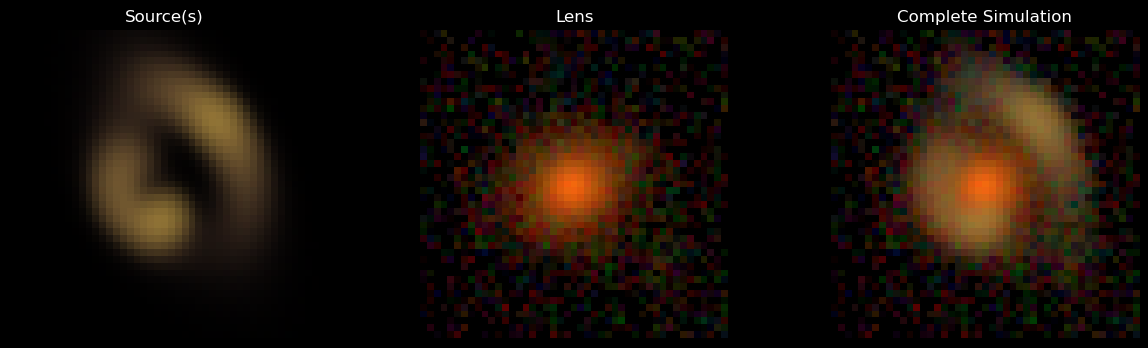

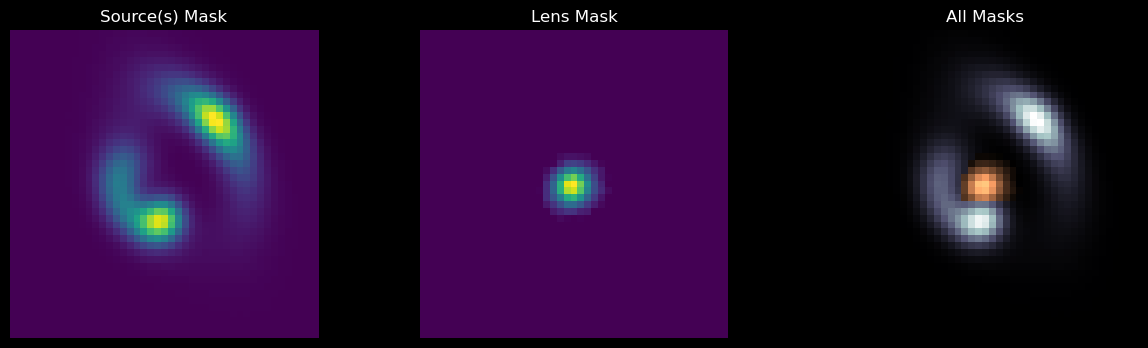

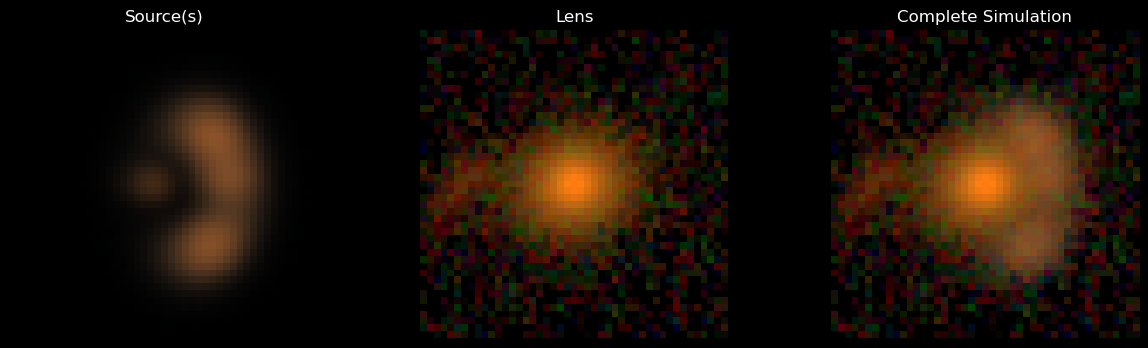

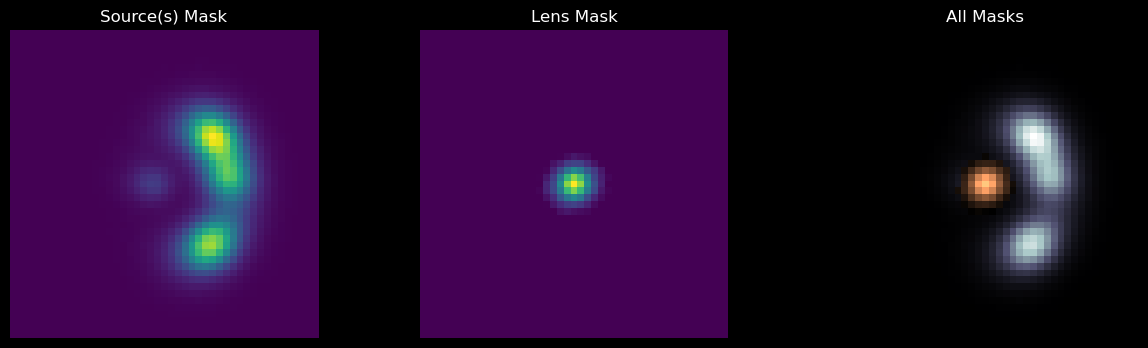

In [8]:
for i in range(2):
    _, _, _, _ = mask_image(coadd_list[i], 1.5, 1.25)

In [9]:
def masking_all():
    """
    mask every simulation & show progress bar
    """
    masks_source = np.zeros((1, NUM_PIX, NUM_PIX))
    masks_lens = np.zeros((1, NUM_PIX, NUM_PIX))
    masks_complete = np.zeros((1, NUM_PIX, NUM_PIX))

    with tqdm(total=len(data)) as pbar:
        for (index, row) in data.iterrows():
            rgb, masked_s, masked_l, masked_c = mask_image(row['Y6_COADD_OBJECT_ID'], 1.5, 1.25)
        
            masks_source = np.append(masks_source, [masked_s], axis=0)
            masks_lens = np.append(masks_lens, [masked_l], axis=0)
            masks_complete = np.append(masks_complete, [masked_c], axis=0)

            pbar.update(1)

    masks_source = np.delete(masks_source, 0, axis=0)
    masks_lens = np.delete(masks_lens, 0, axis=0)
    masks_complete = np.delete(masks_complete, 0, axis=0)
    
    return(masks_complete, masks_source, masks_lens)


In [16]:
def write_fit_file(name, images, data):
    """
    writes fits file with simulation data, simulation images, and mask images
    """
    my_types = {'Y6_COADD_OBJECT_ID': int, 'TILENAME': str, 'HPIX_16384': int, 'HPIX_4096': int,
       'DNF_ZMEAN_SOF': float, 'RA': float, 'DEC': float, 'FLUX_RADIUS_G': float, 'FLUX_RADIUS_R': float,
       'FLUX_RADIUS_I': float, 'FLUX_RADIUS_Z': float, 'KRON_RADIUS': float, 'GAP_FLUX_G': float,
       'MOF_BDF_FLUX_G': float, 'MOF_PSF_FLUX_G': float, 'SOF_BDF_FLUX_G': float, 'SOF_PSF_FLUX_G': float,
       'MAG_AUTO_G': float, 'MAG_APER_4_G': float, 'MAG_APER_8_G': float, 'SOF_BDF_G_1': float,
       'Y3_COADD_OBJECT_ID': int, 'REFMAG': float, 'REFMAG_ERR': float, 'LUM': float, 'ZREDMAGIC': float,
       'ZREDMAGIC_E': float, 'CHISQ': float, 'Z_LENS': float, 'MAG_G': float, 'MAG_R': float, 'MAG_I': float, 'MAG_Z': float,
       'MAG_ERR_G': float, 'MAG_ERR_R': float, 'MAG_ERR_I': float, 'MAG_ERR_Z': float, 'ZG': float, 'ZR': float, 'ZI': float,
       'ZZ': float, 'SOF_BDF_G_2': float, 'IMAFLAGS_ISO_G': int, 'IMAFLAGS_ISO_R': int,
       'IMAFLAGS_ISO_I': int, 'IMAFLAGS_ISO_Z': int, 'EXT_COADD': int, 'FWHM_WMEAN_G': float,
       'FWHM_WMEAN_R': float, 'FWHM_WMEAN_I': float, 'FWHM_WMEAN_Z': float, 'SKYBRITE_WMEAN_G': float,
       'SKYBRITE_WMEAN_R': float, 'SKYBRITE_WMEAN_I': float, 'SKYBRITE_WMEAN_Z': float, 'Z1': float, 'LENSED_MAG': float,     
       'mag_1': float, 'ISOLATION': float, 'EINSTEIN_RADIUS': float, 'MAGNIFICATION': float, 'POSITION1': float}
    data = data.astype(my_types)
    
    sim_images, source_images, lens_images = images[0], images[1], images[2]
    
    primary = fits.PrimaryHDU()
    image1 = fits.ImageHDU(images[0], name="IMAGE")
    image2 = fits.ImageHDU(images[1], name="IMAGE")
    image3 = fits.ImageHDU(images[2], name="IMAGE")
    image4 = fits.ImageHDU(images[3], name="IMAGE")
    image5 = fits.ImageHDU(images[4], name="IMAGE")
    image6 = fits.ImageHDU(images[5], name="IMAGE")
    table_data = Table.from_pandas(data)
    table = fits.BinTableHDU(data = table_data)
    hdu_list = fits.HDUList([primary, image1, image2, image3, image4, image5, image6, table])
    hdu_list.writeto(name + '.fits', overwrite=True)   
    hdu_list.close()

In [17]:
filename_input, filename_output = 'simulation_file', 'labeled_file'
cluster = False
if(cluster):
    filename_input, filename_output = sys.argv[1], sys.argv[1]

hdu_list = fits.open(filename_input + '.fits')

images_sim = hdu_list[1].data  # Complete simulation: source + lens
images_sim = images_sim[:,0:3,:,:]
images_source = hdu_list[2].data  # Only source simulations
images_source = images_source[:,0:3,:,:]
images_lens = hdu_list[3].data  # Only lens galaxy image
images_lens = images_lens[:,0:3,:,:]
data = pd.DataFrame(hdu_list[4].data)
hdu_list.close()

In [12]:
NUM_PIX = 45
# masks_complete, masks_source, masks_lens = masking_all()
# images = [images_sim, images_source, images_lens, masks_complete, masks_source, masks_lens] 
# write_fit_file(filename_output, images, data)

In [10]:
plt.close('all')